In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("failure.csv")

### EDA

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [5]:
df["device"].value_counts()

S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
           ... 
Z1F0LT6P      5
Z1F0LT6Z      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 1168, dtype: int64

In [6]:
df["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [9]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [10]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

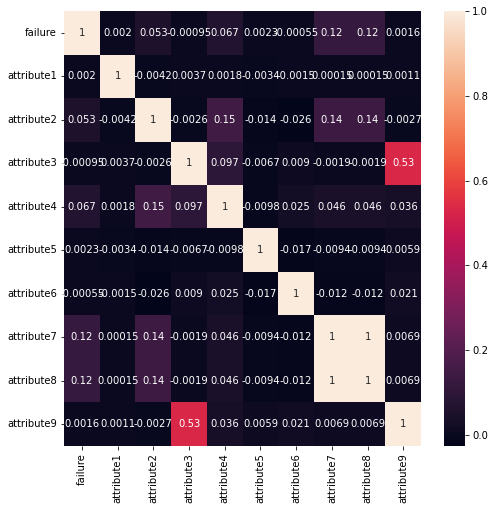

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [12]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6    0.000550
attribute3    0.000948
Name: failure, dtype: float64

### Data Visualization

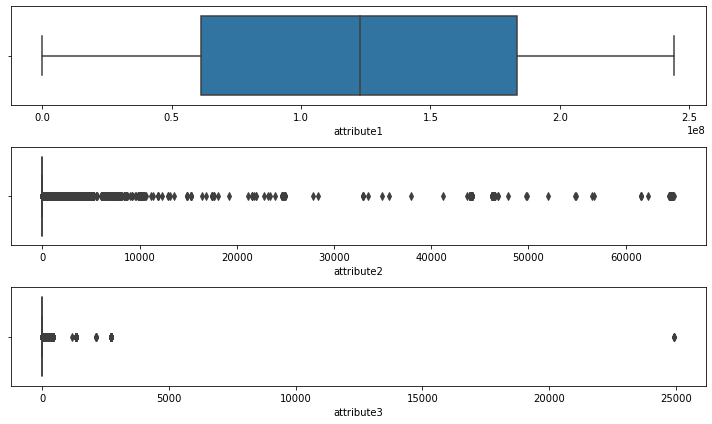

In [13]:
fig = plt.figure(figsize=(10,6))
fig.add_subplot(3,1,1)
sns.boxplot(df['attribute1'])
fig.add_subplot(3,1,2)
sns.boxplot(df['attribute2'])
fig.add_subplot(3,1,3)
sns.boxplot(df['attribute3'])
plt.tight_layout();

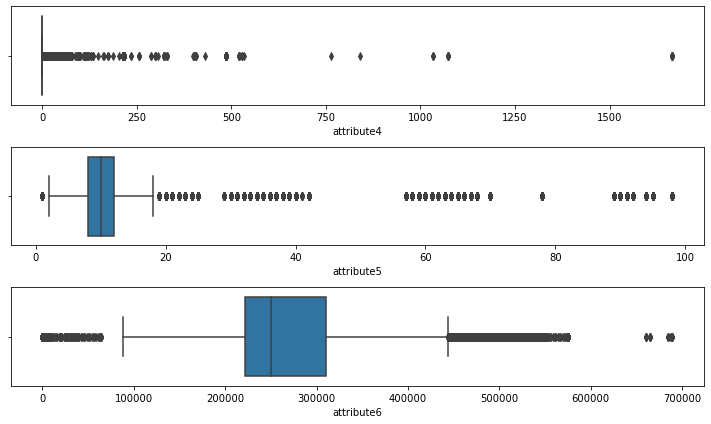

In [14]:
fig = plt.figure(figsize=(10,6))
fig.add_subplot(3,1,1)
sns.boxplot(df['attribute4'])
fig.add_subplot(3,1,2)
sns.boxplot(df['attribute5'])
fig.add_subplot(3,1,3)
sns.boxplot(df['attribute6'])
plt.tight_layout();

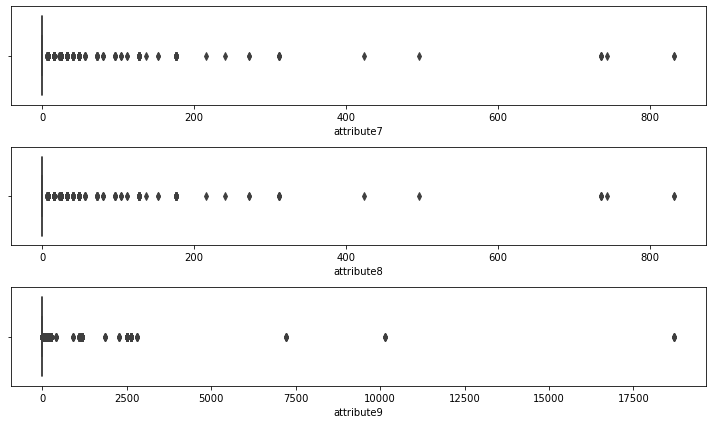

In [15]:
fig = plt.figure(figsize=(10,6))
fig.add_subplot(3,1,1)
sns.boxplot(df['attribute7'])
fig.add_subplot(3,1,2)
sns.boxplot(df['attribute8'])
fig.add_subplot(3,1,3)
sns.boxplot(df['attribute9'])
plt.tight_layout();

<AxesSubplot:>

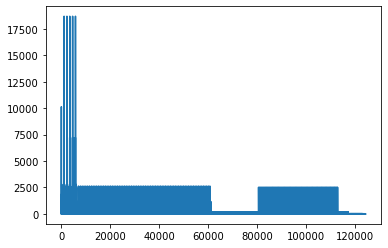

In [16]:
df.attribute9.plot()

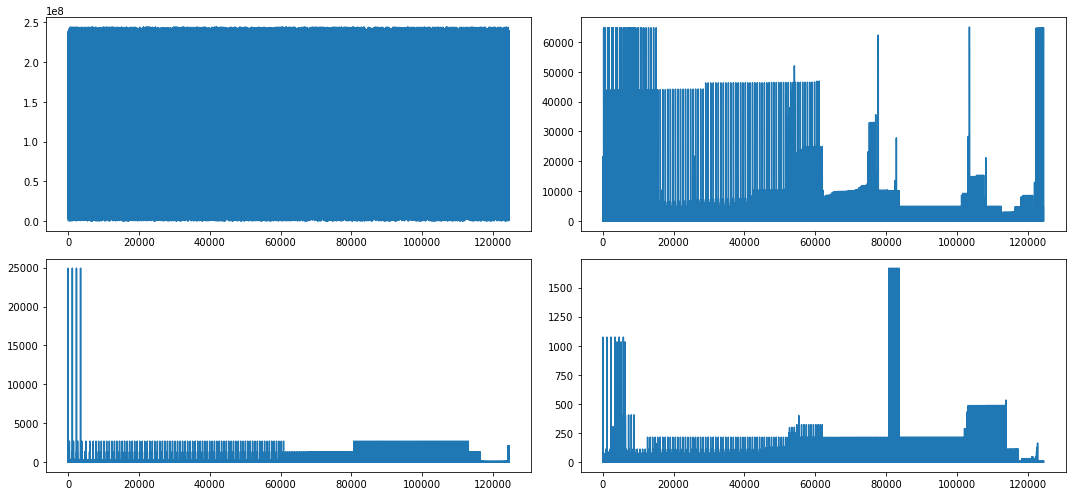

In [17]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
df.attribute1.plot()
fig.add_subplot(2,2,2)
df.attribute2.plot()
fig.add_subplot(2,2,3)
df.attribute3.plot()
fig.add_subplot(2,2,4)
df.attribute4.plot()
plt.tight_layout()

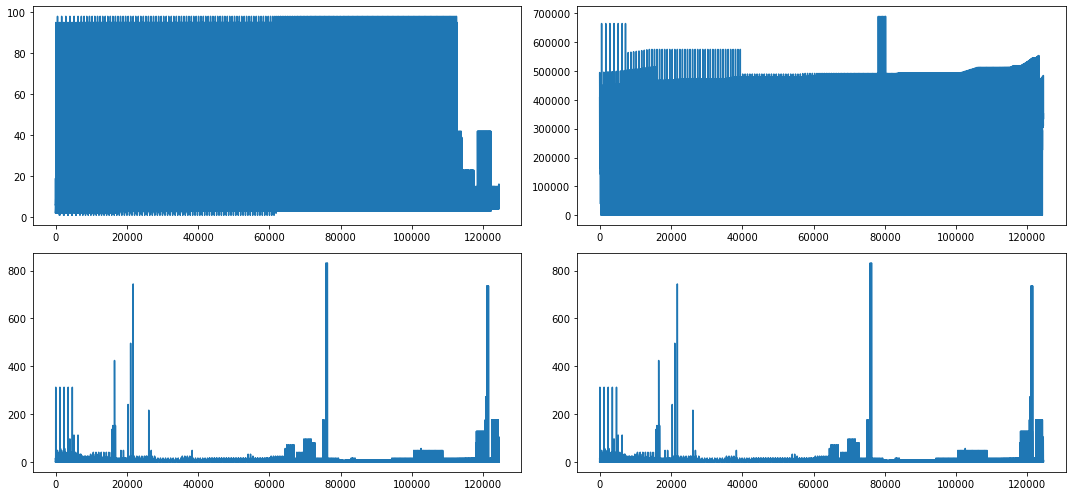

In [18]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
df.attribute5.plot()
fig.add_subplot(2,2,2)
df.attribute6.plot()
fig.add_subplot(2,2,3)
df.attribute7.plot()
fig.add_subplot(2,2,4)
df.attribute8.plot()
plt.tight_layout()

<AxesSubplot:>

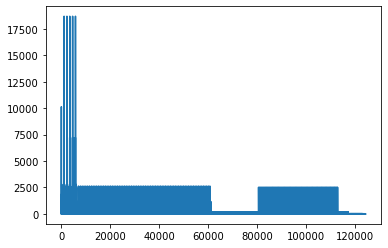

In [19]:
df.attribute9.plot()

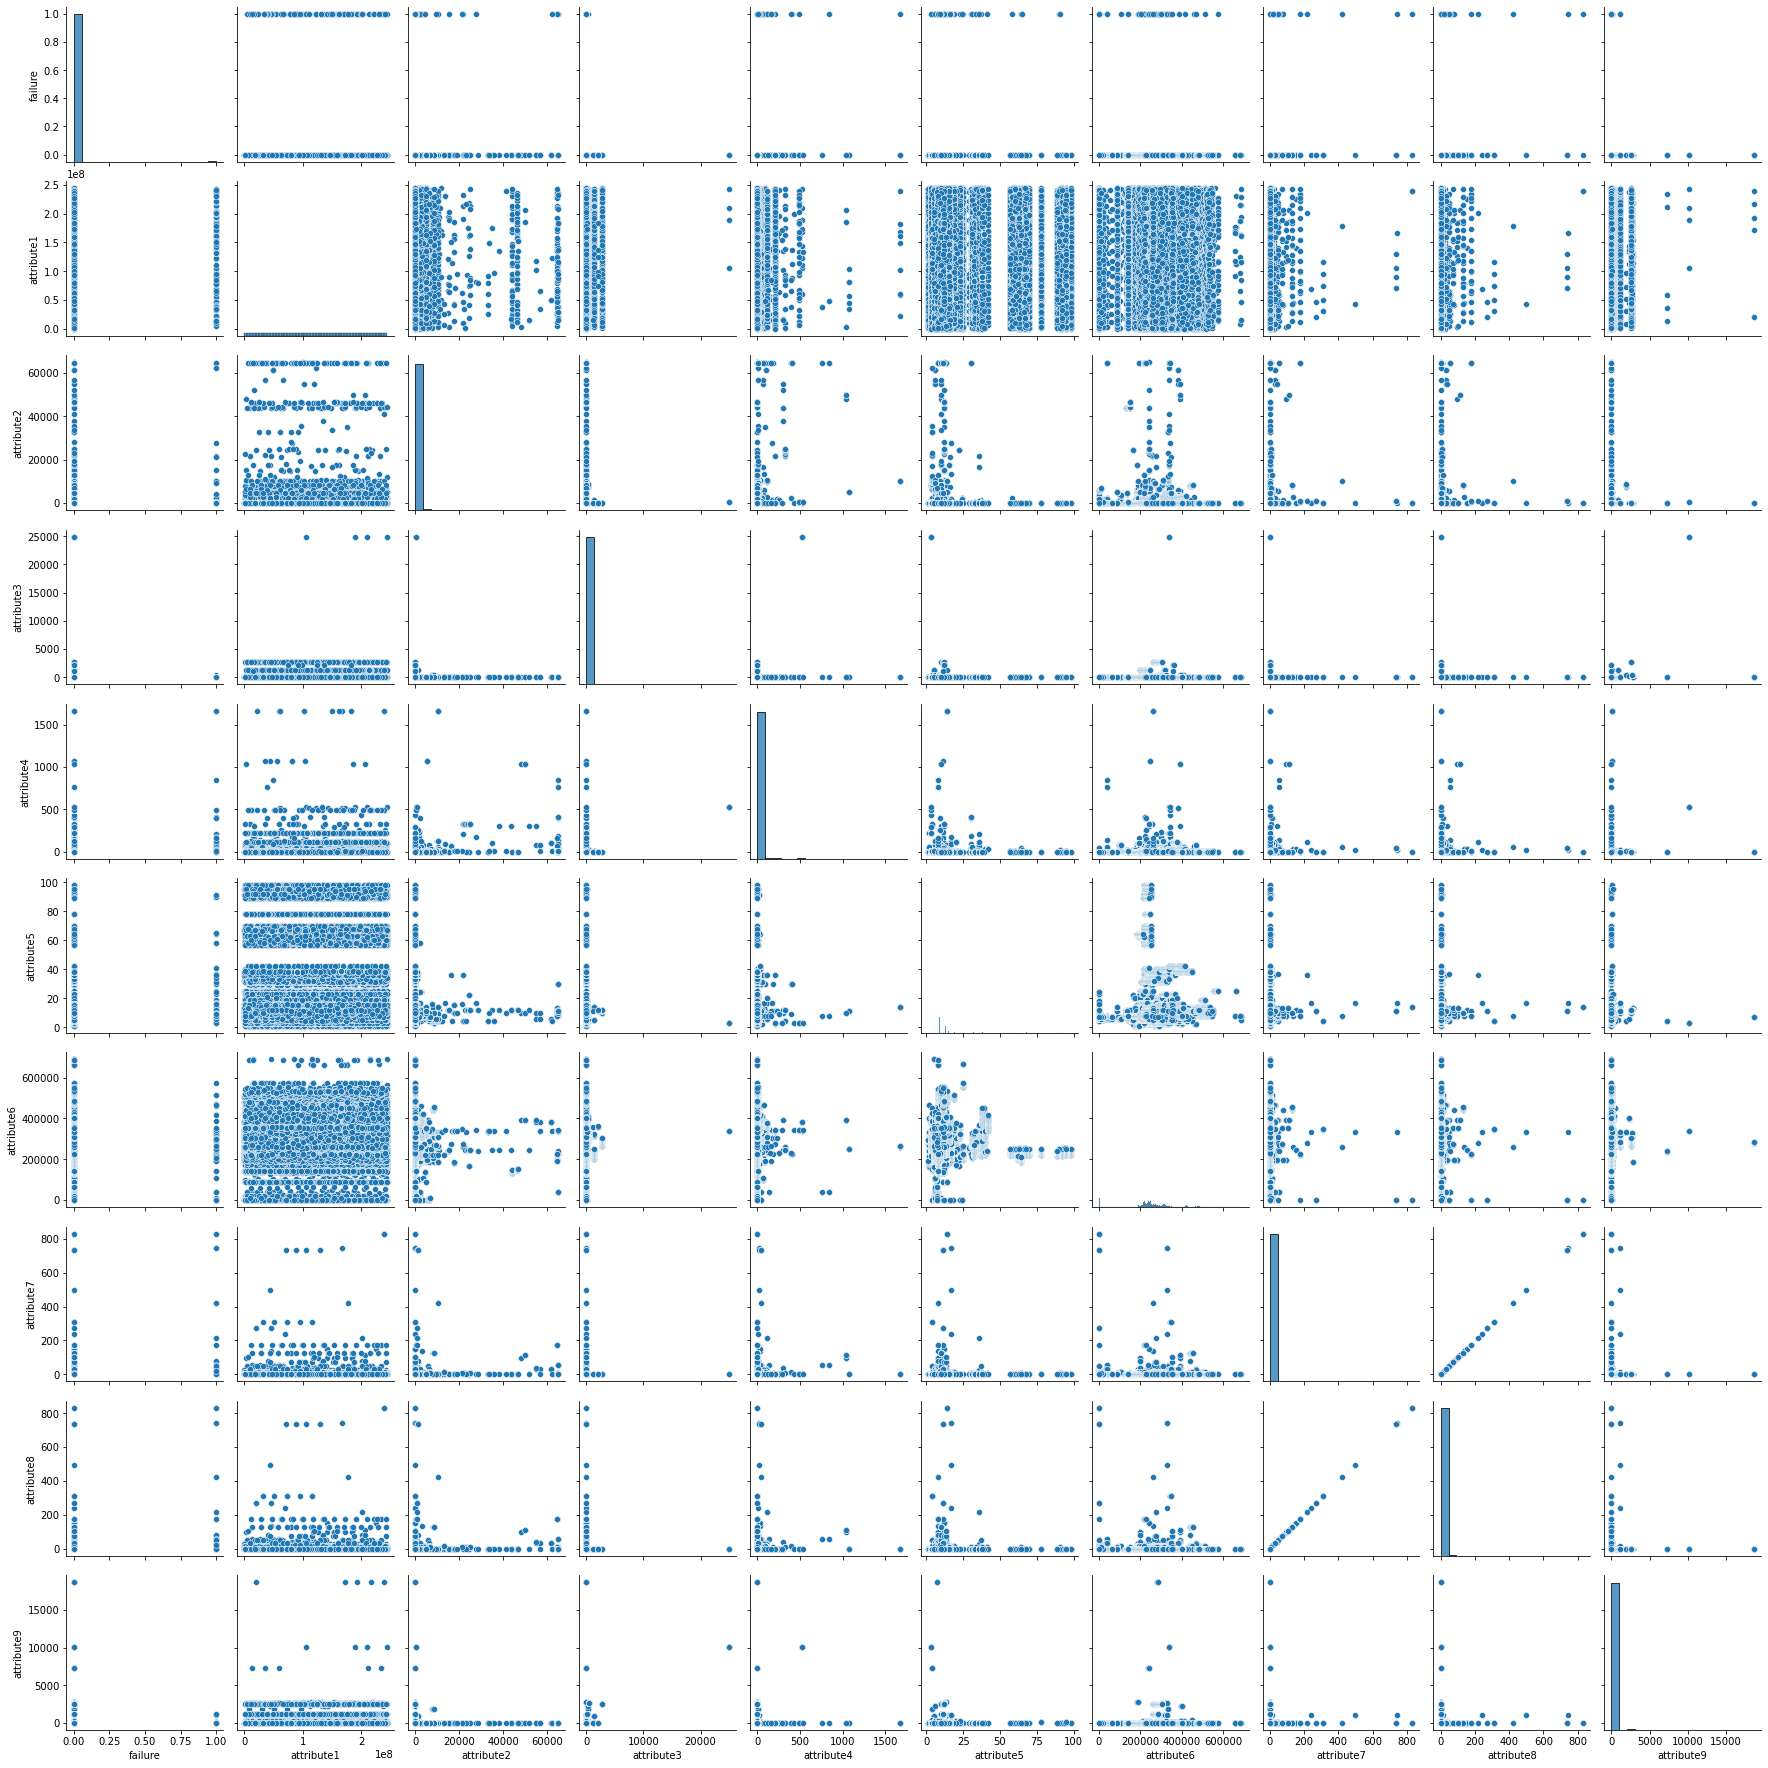

In [20]:
sns.pairplot(df)

### Feature Engineering

In [21]:
df['device']=df['device'].astype("category")

In [22]:
#!pip install imblearn

In [23]:
x = df[['device']]

In [24]:
x.head()

,device
0,S1F01085
1,S1F0166B
2,S1F01E6Y
3,S1F01JE0
4,S1F01R2B


In [25]:
y = df[['failure']]

In [26]:
y.shape

(124494, 1)

In [27]:
y.head()

,failure
0,0
1,0
2,0
3,0
4,0


In [28]:
x=pd.get_dummies(x,drop_first=True)

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

In [30]:
X_sm

,device_S1F013BB,device_S1F0166B,device_S1F01E6Y,device_S1F01JE0,device_S1F01R2B,device_S1F01TD5,device_S1F01XDJ,device_S1F023H2,device_S1F02A0J,device_S1F02DZ2,device_S1F02EVN,device_S1F02L38,device_S1F02MGA,device_S1F02P76,device_S1F02VAX,device_S1F02W1L,device_S1F02WFT,device_S1F02XLX,device_S1F0318A,device_S1F0322R,device_S1F0330P,device_S1F03499,device_S1F035SJ,device_S1F0377V,device_S1F039FE,device_S1F03RV3,device_S1F03YZM,device_S1F044ET,device_S1F049RX,device_S1F04DH8,device_S1F04KSC,device_S1F04MVQ,device_S1F04R7Y,device_S1F04TS4,device_S1F04Y6C,device_S1F059G0,device_S1F05AFP,device_S1F05B1Q,device_S1F05NAJ,device_S1F05P51,device_S1F05P5Z,device_S1F06E04,device_S1F06F7K,device_S1F06R6W,device_S1F06ZX2,device_S1F08R94,device_S1F08S38,device_S1F09DZQ,device_S1F09MAK,device_S1F09MSM,...,device_Z1F1652D,device_Z1F1653X,device_Z1F16BR1,device_Z1F16G31,device_Z1F16LDN,device_Z1F17XPD,device_Z1F17YTD,device_Z1F17Z3N,device_Z1F17ZCN,device_Z1F18YB3,device_Z1F18YST,device_Z1F1901P,device_Z1F19ENW,device_Z1F19KMH,device_Z1F19QH0,device_Z1F19QM3,device_Z1F19TP2,device_Z1F19TVX,device_Z1F19VF5,device_Z1F1A0CJ,device_Z1F1A0LM,device_Z1F1A0RP,device_Z1F1A1HH,device_Z1F1A7MG,device_Z1F1A83K,device_Z1F1AD0M,device_Z1F1AF54,device_Z1F1AFF2,device_Z1F1AFT5,device_Z1F1AG5N,device_Z1F1AGLA,device_Z1F1AGN5,device_Z1F1AGW1,device_Z1F1B6H4,device_Z1F1B6NP,device_Z1F1B799,device_Z1F1CZ35,device_Z1F1FCH5,device_Z1F1FZ9J,device_Z1F1HEQR,device_Z1F1HSWK,device_Z1F1Q9BD,device_Z1F1R76A,device_Z1F1RE71,device_Z1F1RJFA,device_Z1F1VMZB,device_Z1F1VQFY,device_Z1F26YZB,device_Z1F282ZV,device_Z1F2PBHX
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248773,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
x

,device_S1F013BB,device_S1F0166B,device_S1F01E6Y,device_S1F01JE0,device_S1F01R2B,device_S1F01TD5,device_S1F01XDJ,device_S1F023H2,device_S1F02A0J,device_S1F02DZ2,device_S1F02EVN,device_S1F02L38,device_S1F02MGA,device_S1F02P76,device_S1F02VAX,device_S1F02W1L,device_S1F02WFT,device_S1F02XLX,device_S1F0318A,device_S1F0322R,device_S1F0330P,device_S1F03499,device_S1F035SJ,device_S1F0377V,device_S1F039FE,device_S1F03RV3,device_S1F03YZM,device_S1F044ET,device_S1F049RX,device_S1F04DH8,device_S1F04KSC,device_S1F04MVQ,device_S1F04R7Y,device_S1F04TS4,device_S1F04Y6C,device_S1F059G0,device_S1F05AFP,device_S1F05B1Q,device_S1F05NAJ,device_S1F05P51,device_S1F05P5Z,device_S1F06E04,device_S1F06F7K,device_S1F06R6W,device_S1F06ZX2,device_S1F08R94,device_S1F08S38,device_S1F09DZQ,device_S1F09MAK,device_S1F09MSM,...,device_Z1F1652D,device_Z1F1653X,device_Z1F16BR1,device_Z1F16G31,device_Z1F16LDN,device_Z1F17XPD,device_Z1F17YTD,device_Z1F17Z3N,device_Z1F17ZCN,device_Z1F18YB3,device_Z1F18YST,device_Z1F1901P,device_Z1F19ENW,device_Z1F19KMH,device_Z1F19QH0,device_Z1F19QM3,device_Z1F19TP2,device_Z1F19TVX,device_Z1F19VF5,device_Z1F1A0CJ,device_Z1F1A0LM,device_Z1F1A0RP,device_Z1F1A1HH,device_Z1F1A7MG,device_Z1F1A83K,device_Z1F1AD0M,device_Z1F1AF54,device_Z1F1AFF2,device_Z1F1AFT5,device_Z1F1AG5N,device_Z1F1AGLA,device_Z1F1AGN5,device_Z1F1AGW1,device_Z1F1B6H4,device_Z1F1B6NP,device_Z1F1B799,device_Z1F1CZ35,device_Z1F1FCH5,device_Z1F1FZ9J,device_Z1F1HEQR,device_Z1F1HSWK,device_Z1F1Q9BD,device_Z1F1R76A,device_Z1F1RE71,device_Z1F1RJFA,device_Z1F1VMZB,device_Z1F1VQFY,device_Z1F26YZB,device_Z1F282ZV,device_Z1F2PBHX
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Columns: 1167 entries, device_S1F013BB to device_Z1F2PBHX
dtypes: uint8(1167)
memory usage: 138.6 MB


In [33]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6    0.000550
attribute3    0.000948
Name: failure, dtype: float64

### Classification

In [34]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [35]:
#classification_funct(X_sm,y_sm)

In [36]:
g=GaussianNB()
x_train, x_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=13)
g.fit(x_train,y_train)    
confusion_matrix(g.predict(x_test),y_test)

array([[22840,     0],
       [ 2166, 24750]], dtype=int64)

In [37]:
b=BernoulliNB()
x_train, x_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=13)
b.fit(x_train,y_train)    
confusion_matrix(b.predict(x_test),y_test)

array([[22841,     0],
       [ 2165, 24750]], dtype=int64)

In [38]:
k=KNeighborsClassifier()
x_train, x_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=13)
k.fit(x_train,y_train)    
confusion_matrix(k.predict(x_test),y_test)

array([[25003,   142],
       [    3, 24608]], dtype=int64)

In [39]:
l=LogisticRegression()
x_train, x_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=13)
l.fit(x_train,y_train)    
confusion_matrix(l.predict(x_test),y_test)

array([[25006,   146],
       [    0, 24604]], dtype=int64)

In [40]:
d=DecisionTreeClassifier()
x_train, x_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=13)
d.fit(x_train,y_train)    
confusion_matrix(d.predict(x_test),y_test)

array([[25000,   118],
       [    6, 24632]], dtype=int64)

In [41]:
r=RandomForestClassifier()
x_train, x_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=13)
r.fit(x_train,y_train)    
confusion_matrix(r.predict(x_test),y_test)

array([[25000,   118],
       [    6, 24632]], dtype=int64)

In [42]:
gb=GradientBoostingClassifier()
x_train, x_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=13)
gb.fit(x_train,y_train)    
confusion_matrix(gb.predict(x_test),y_test)

array([[25006,   119],
       [    0, 24631]], dtype=int64)

In [46]:
accuracy_score(y_test,k.predict(x_test))

0.9970857785995659

In [47]:
accuracy_score(y_test,l.predict(x_test))

0.9970656805209422

In [48]:
accuracy_score(y_test,d.predict(x_test))

0.9975078382506632

In [49]:
accuracy_score(y_test,r.predict(x_test))

0.9975078382506632

In [50]:
accuracy_score(y_test,gb.predict(x_test))

0.9976083286437817